# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here

df.shape

(1898, 9)

#### Observations:
In the given data set of foodhub.csv, based on the result of code executed above, we can see that there are 1898 rows and 9 columns representing the complete data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Based of the result of df.info(), we can observe that there are few coulmns which has datatypes as listed below

order_id, customer_id, food_preparation_time, delivery_time has data type as int64
restaurant_name, cuisine_type, day_if_the_week, rating has data type as object
cost_of_the_order has data type as float as it is cost


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
As we can observe that the result of df.isnull().sum() explains that there are no null values in given data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Based of the result of df.describe(), we can say that the time to prepare food when order is placed is as follows.

Minimum time taken = 20.000000 minutes
Average time taken = 27.371970 minutes
Maximum time taken = 35.000000 minutes

### **Question 5:** How many orders are not rated?

In [8]:
# Write the code here
df['rating'][df['rating'] == 'Not given'].count()

736

#### Observations:
Based on result of command executed above, we can see that there are 736 records in the data set which do not have ratings provided.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

C:\Users\manda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\manda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)


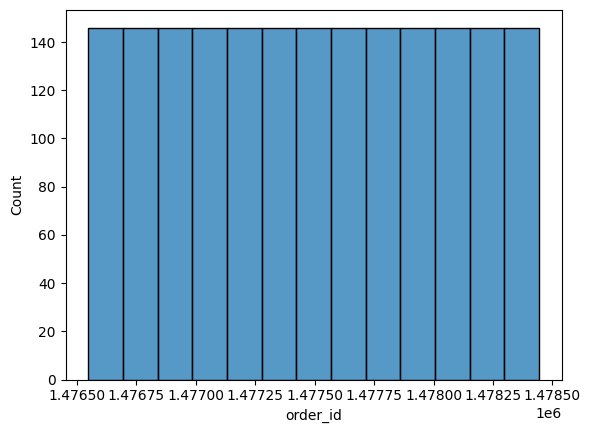

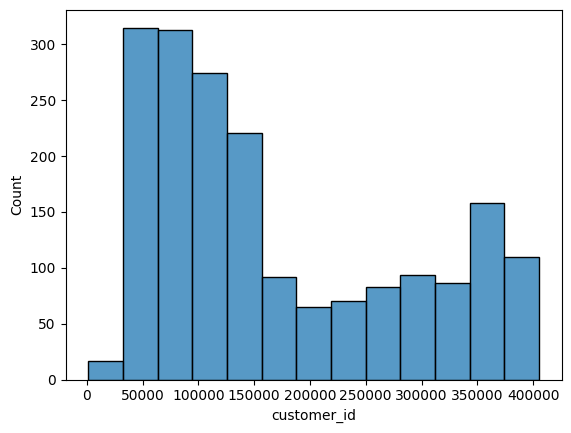

C:\Users\manda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


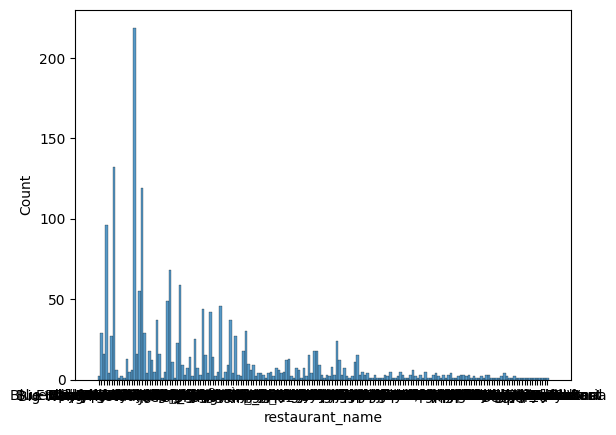

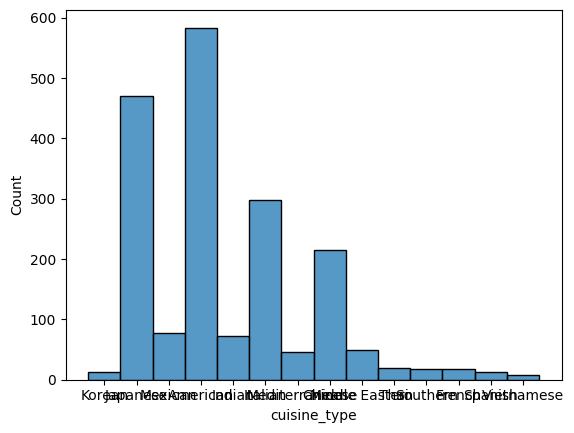

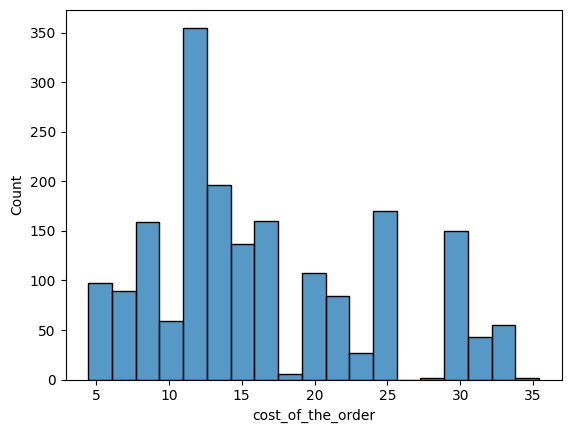

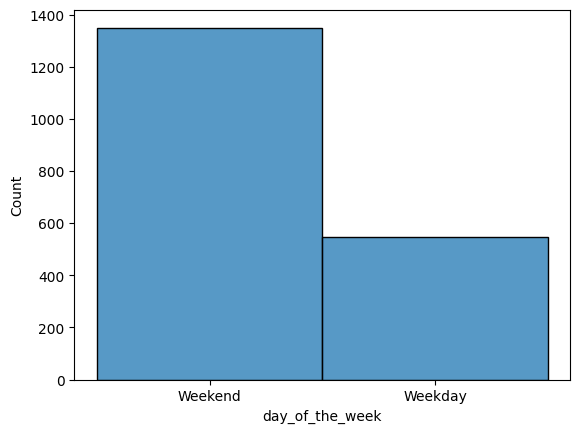

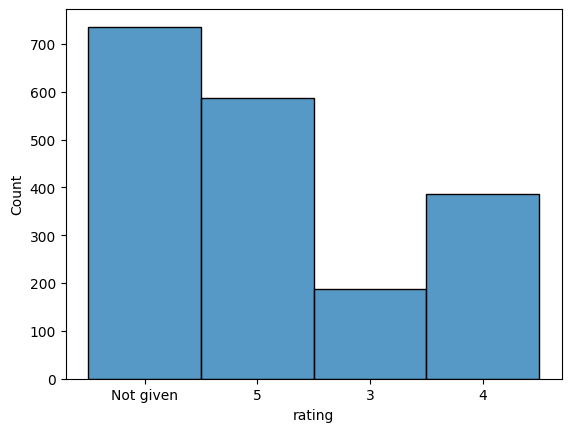

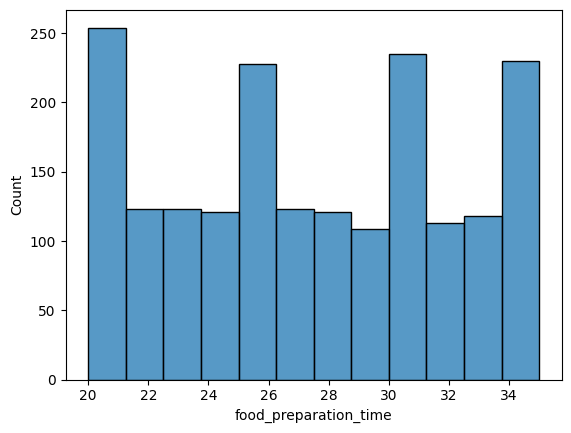

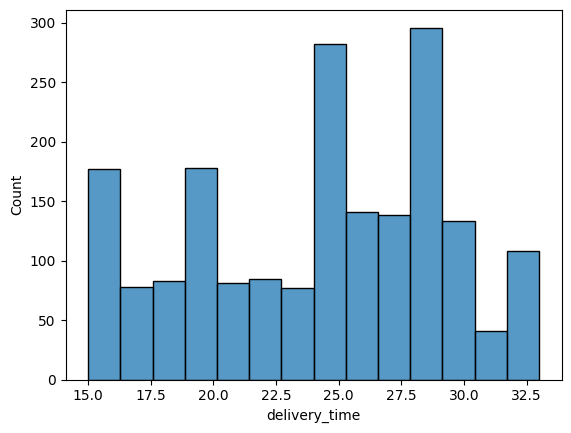

In [9]:
# Write the code here

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [10]:
# Write the code here
# replace 'Not given' ratings with 0
df.replace('Not given', 0, inplace=True)
df.groupby(df['restaurant_name']).count().sort_values(by='order_id', ascending=False)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68
...,...,...,...,...,...,...,...,...
Klong,1,1,1,1,1,1,1,1
Kambi Ramen House,1,1,1,1,1,1,1,1
Il Bambino,1,1,1,1,1,1,1,1


#### Observations:
Based on the result of code executed above, we can see that the top 5 restaurant are as follows.

Shake shack
The Meatball Shop
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [11]:
# Write the code here
df_cuisine = df[df['day_of_the_week']=='Weekend']
df_cuisine.groupby(df_cuisine['cuisine_type']).count().sort_values(by='order_id', ascending=False)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53
Indian,49,49,49,49,49,49,49,49
Mediterranean,32,32,32,32,32,32,32,32
Middle Eastern,32,32,32,32,32,32,32,32
Thai,15,15,15,15,15,15,15,15


#### Observations:
based on results displayed above, we can say that the American cuisine is popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [12]:
# Write the code here

percentage = (df['cost_of_the_order'][df['cost_of_the_order'] > 20].count()/df['cost_of_the_order'].count())*100
percentage

29.24130663856691

#### Observations:
29.2413% of order cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [13]:
# Write the code here
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
Mean order delivery time is 24.161749 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [14]:
# Write the code here
df.groupby(df['customer_id']).count().sort_values(by='order_id', ascending=False)

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
customer_id,,,,,,,,
52832,13,13,13,13,13,13,13,13
47440,10,10,10,10,10,10,10,10
83287,9,9,9,9,9,9,9,9
250494,8,8,8,8,8,8,8,8
65009,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...
105903,1,1,1,1,1,1,1,1
105992,1,1,1,1,1,1,1,1
106006,1,1,1,1,1,1,1,1


#### Observations:
Based on results displayed above, details of customer id's and their number of orders are as follows

Customer id 52832 placed 13 orders,
customer id 47440 placed 10 orders,
customer id 83287 placed 9 orders.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

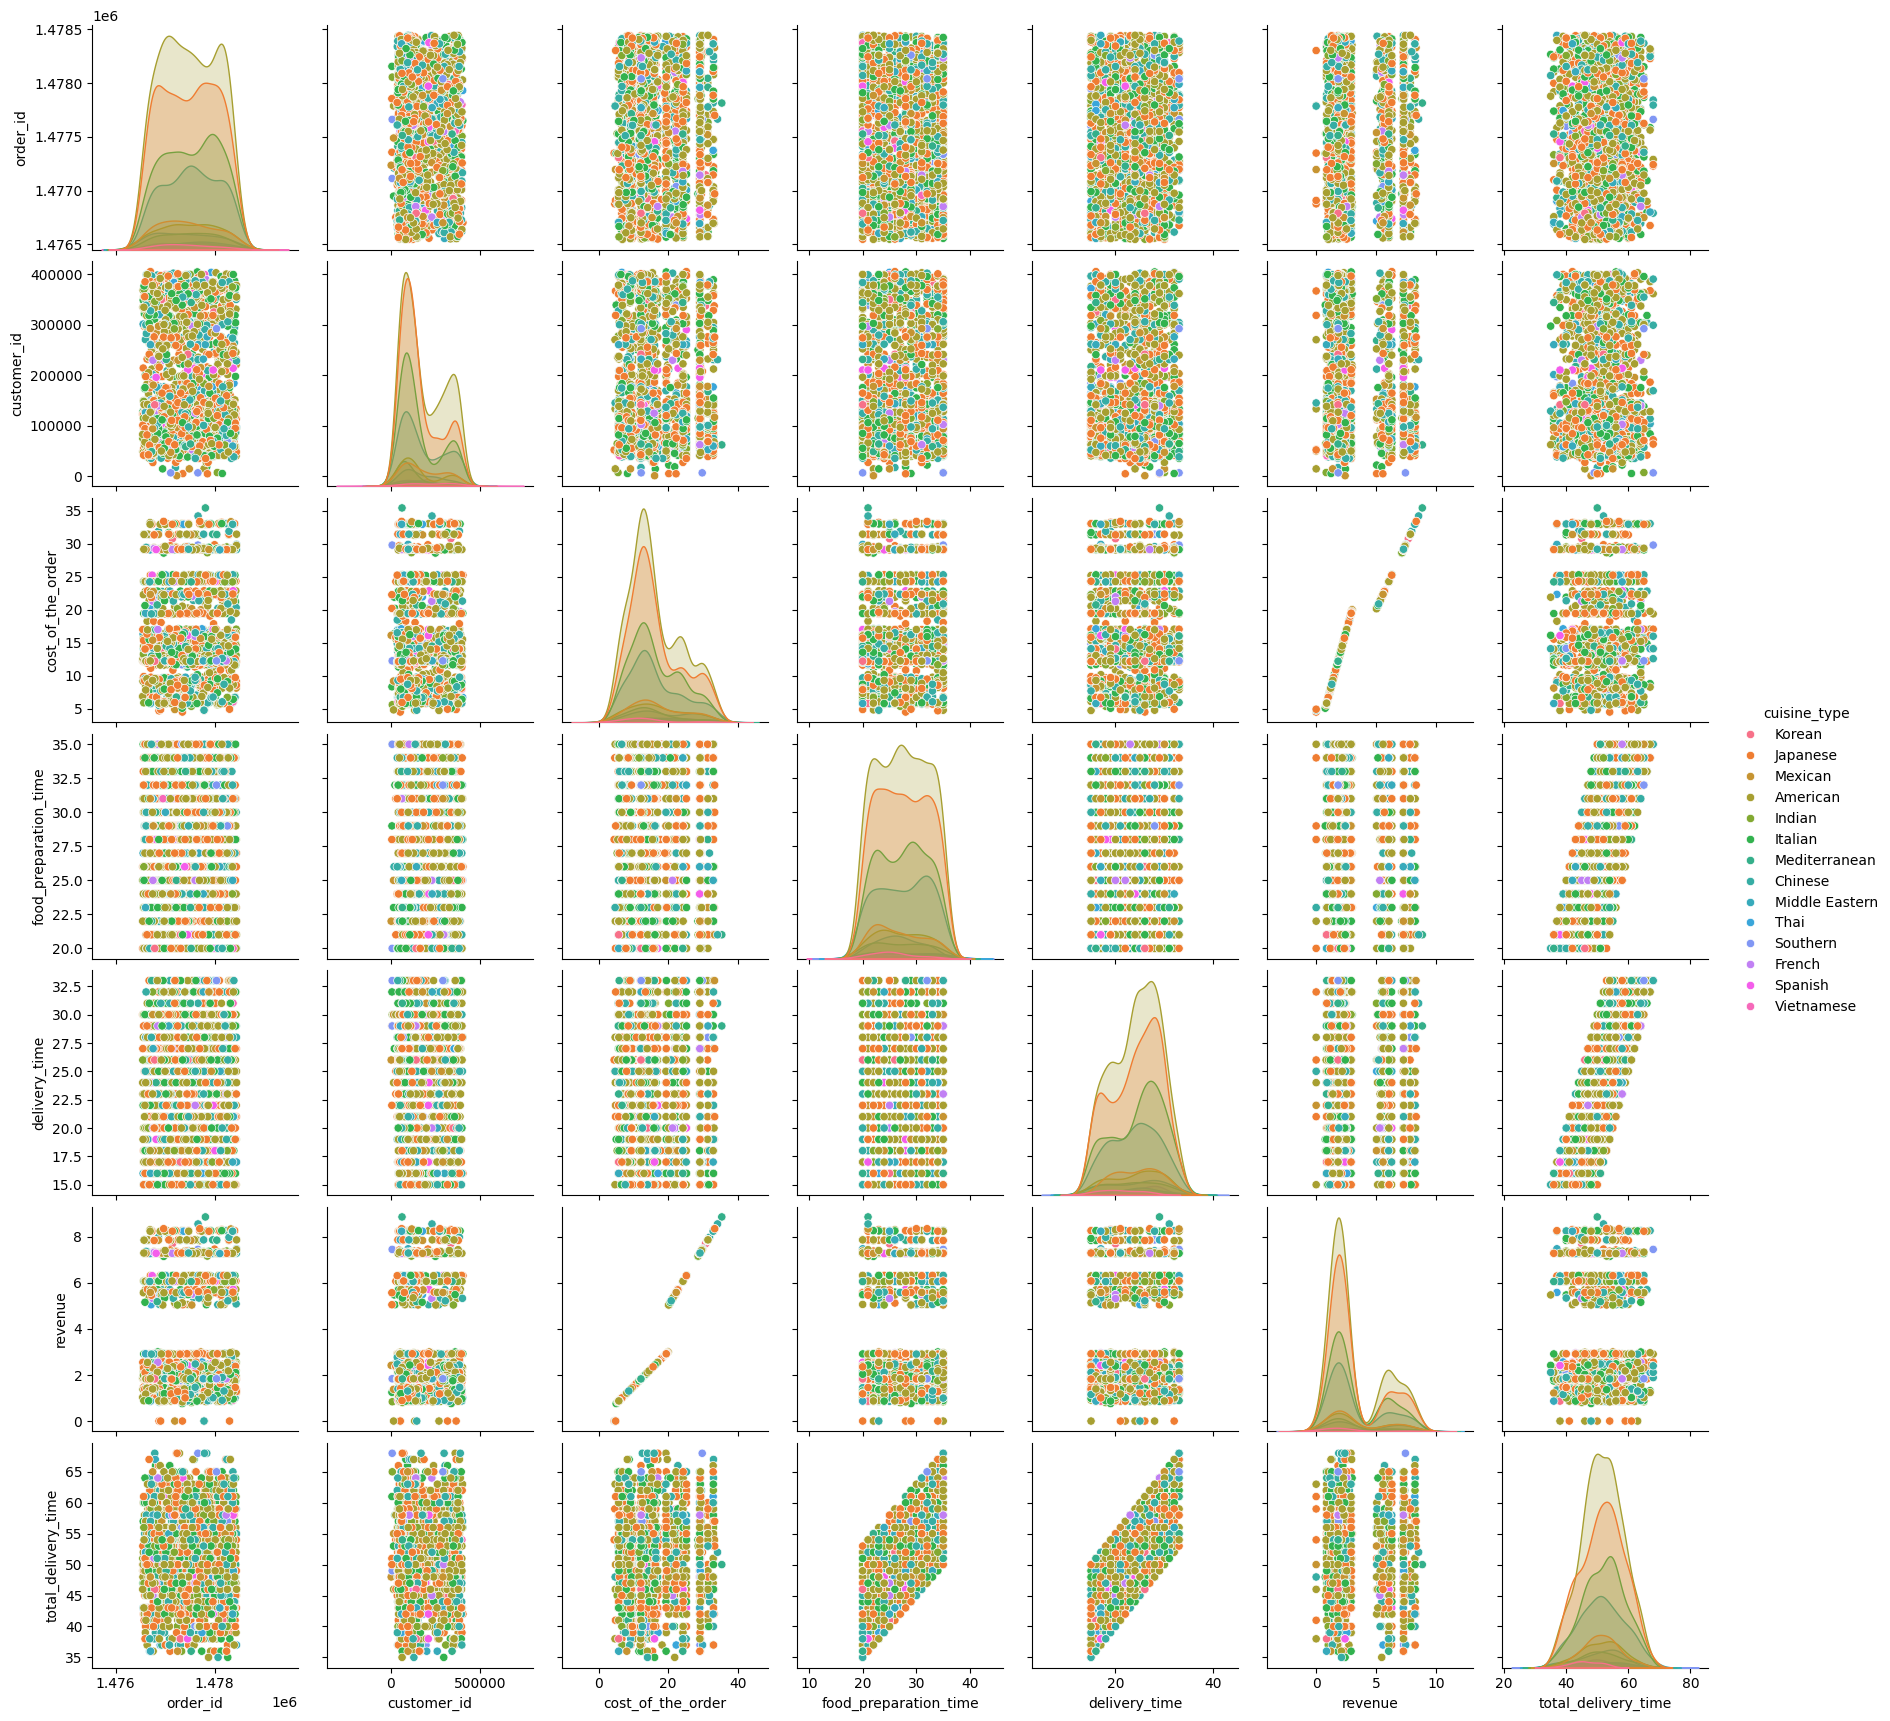

In [22]:
# Write the code here
df_dummies = pd.get_dummies(df,dtype='int64')  
sns.pairplot(df,kind='scatter',hue='cuisine_type')
#df_dummies


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [16]:
# Write the code here

df1=df.drop(df[df['rating'] == 0].index)

#convert all entries of rating to numeric
df1['rating'] = df1['rating'].apply(lambda x: int(x))

#Lets extract 'restaurant_name' and 'rating' columns and then find count as well as mean of ratings for each restaurant
df_offer = df1[['restaurant_name', 'rating']]
df_offer_count=df_offer.groupby(by='restaurant_name').count()
df_offer_mean=df_offer.groupby(by='restaurant_name').mean()

#Lets convert index to column and then reset index and then sort the dataframe
df_offer_count['restaurant_name'] = df_offer_count.index
df_offer_mean['restaurant_name'] = df_offer_mean.index

df_offer_count.reset_index(drop=True, inplace=True)
df_offer_count['rating'].rename('Count_rating', inplace=True)
df_offer_count.sort_values(inplace=True, by='restaurant_name', ascending=False)

df_offer_mean.reset_index(drop=True, inplace=True)
df_offer_mean['rating'].rename('Avg_rating', inplace=True)
df_offer_mean.sort_values(inplace=True, by='restaurant_name', ascending=False)

#Lets merge two data frames to get the final data frame which contains count and mean of ratings for each restaurant

df_offer_merged = pd.merge(df_offer_count, df_offer_mean, on='restaurant_name')

#Lets filter the restaurants which have more than 50 ratings and average rating more than 4
df_offer_list = df_offer_merged[(df_offer_merged['rating_x'] > 50) & (df_offer_merged['rating_y'] > 4)]
df_offer_list

#df['rating'].unique()


,rating_x,restaurant_name,rating_y
23,84,The Meatball Shop,4.511905
38,133,Shake Shack,4.278195
138,73,Blue Ribbon Sushi,4.219178
139,64,Blue Ribbon Fried Chicken,4.328125


#### Observations:

As displayed above, the list of restaurants eligible for this offer are as given below. These restaurants have more than 50 ratings and average rating is also more than 4.


rating_x	restaurant_name	rating_y
23	84	The Meatball Shop	4.511905
38	133	Shake Shack	4.278195
138	73	Blue Ribbon Sushi	4.219178
139	64	Blue Ribbon Fried Chicken	4.328125


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [17]:
# Write the code here

df['revenue'] = df['cost_of_the_order'].apply(lambda x: x*0.25 if x > 20 else (x*0.15 if (x > 5 and x <=20) else 0))

df['revenue'].sum()


6166.303

#### Observations:

Based on the code executed above, the total revenue of the company is $6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [18]:
# Write the code here
#To calculate accurate total delivery time, we need to add time required to 
#prepare food and then time required to deliver it.

df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_of_delivery_taking_more_than_60_minutes = (df['total_delivery_time'][df['total_delivery_time']>60].count()/df['total_delivery_time'].count())*100
percentage_of_delivery_taking_more_than_60_minutes


10.537407797681771

#### Observations:
Total 10.54% of delivery takes more than 60 minutes to get deliverd from the time order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [19]:
# Write the code here

#Lets find mean delivery time for weekdays first

mean_delivery_time_weekdays = df['delivery_time'][df['day_of_the_week'] == 'Weekday'].mean()
mean_delivery_time_weekends = df['delivery_time'][df['day_of_the_week'] == 'Weekend'].mean()
diff_mean_delivery_time = mean_delivery_time_weekdays - mean_delivery_time_weekends
diff_mean_delivery_time

5.870014357297798

#### Observations:
Mean delivery time varies by 5.87 hrs over the weekdays as compared to weekends 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Based on analysis done so far, it seems like,
1. Revenue is related to cost_of_the_order. When cost of the food is high, revenue also increases.
2. On weekdays, average delivery time is greater than that of weekends


### Recommendations:

*  

---